In [80]:
%%capture
%run ./read_data.ipynb

### SVM

In [81]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV, cross_val_score
import pandas as pd
import matplotlib.pyplot as plt
svr = SVR(kernel='rbf', C=1e3, gamma=0.01) 
svr.fit(X_train, y_train)

SVR(C=1000.0, gamma=0.01)

In [82]:
train_test_report(svr)

Train score: 		         0.9156
Test score: 		         0.9159


<Figure size 432x288 with 0 Axes>

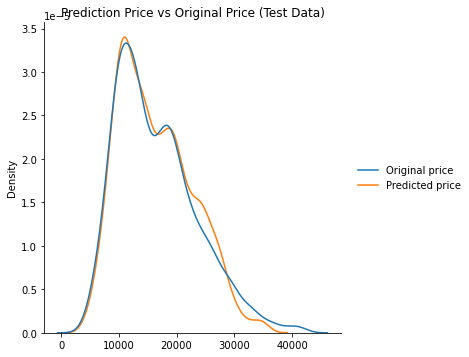

In [83]:
plot_prediction_compare_ori(svr,title="Prediction Price vs Original Price (Test Data)")

<Figure size 432x288 with 0 Axes>

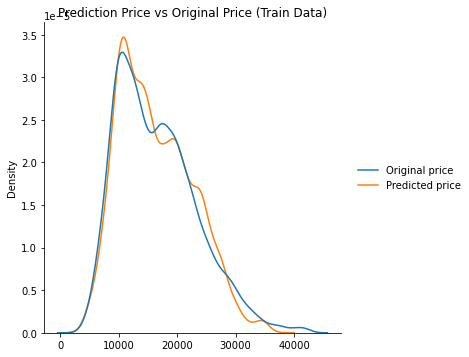

In [84]:
plot_prediction_compare_ori(svr, X_train, y_train,title="Prediction Price vs Original Price (Train Data)")

### Find best parameters using grid search

In [85]:
tuned_parameters = {
    'C': [ 0.0001,0.001,0.01, 0.1, 1, 10,1000],
    'gamma': [0.001, 0.01,0.1, 1, 10, 5],
}

In [86]:
svr_tuned = GridSearchCV(svr,tuned_parameters,cv=5)
svr_tuned.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVR(C=1000.0, gamma=0.01),
             param_grid={'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 1000],
                         'gamma': [0.001, 0.01, 0.1, 1, 10, 5]})

In [87]:
train_test_report(svr_tuned)

Train score: 		         0.9421
Test score: 		         0.9393


In [88]:
gs_report(svr_tuned)

Best score: 			         0.9388
Best parameters: 		{'C': 1000, 'gamma': 0.1}
Best estimator: 		SVR(C=1000, gamma=0.1)


In [89]:
regression_report_compare_model(svr,svr_tuned)

Before tuning hyperparameter: 

Accuracy score: 			         0.9166
R-squared score: 			         0.9159
Mean Absolute Error(MAE): 		      1416.1285
Mean Squared Error (MSE): 		   4080694.1537
Root Mean Squared Error (RSME): 	      2020.0728
-------------------------------------------------------
After tuning hyper parameter: 

Accuracy score: 			         0.9398
R-squared score: 			         0.9393
Mean Absolute Error(MAE): 		      1158.5457
Mean Squared Error (MSE): 		   2944487.8195
Root Mean Squared Error (RSME): 	      1715.9510


In [119]:
tuned_svr_cv = cross_val_score(svr_tuned, X, y, cv=5)
svr_cv = cross_val_score(svr, X, y, cv=5)

In [120]:
cv_df = pd.DataFrame({'Original SVR CV score': svr_cv, 
                    'Tuned SVR CV score': tuned_svr_cv})

In [126]:
cv_df

,Original SVR CV score,Tuned SVR CV score
0,0.844794,0.865731
1,0.879629,0.901784
2,0.821166,0.821166
3,0.890076,0.907879


In [127]:
cv_df.mean()

Original SVR CV score    0.858916
Tuned SVR CV score       0.874140
dtype: float64

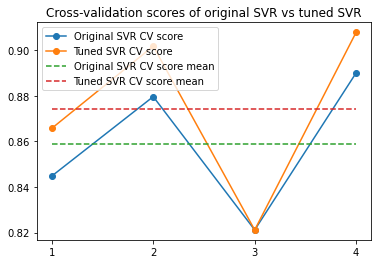

In [128]:
plt.figure()
plt.title('Cross-validation scores of original SVR vs tuned SVR')
plt.plot(cv_df['Original SVR CV score'], label='Original SVR CV score', marker='o')
plt.plot(cv_df['Tuned SVR CV score'], label='Tuned SVR CV score', marker='o')
# mean
plt.plot([cv_df['Original SVR CV score'].mean()] * len(cv_df), 
            label='Original SVR CV score mean', linestyle='--')
plt.plot([cv_df['Tuned SVR CV score'].mean()] * len(cv_df),
         label='Tuned SVR CV score mean', linestyle='--')
plt.xticks([0,1,2,3],[1,2,3,4])    
plt.legend()
plt.show()